##Author: Pratik Kumar Jha
The Sparks Foundation's GRIP

BATCH SEP 2023

TASK 2: Prediction using Unsupervised Machine Learning Technique.

In [ ]:
#importing neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the data
data=pd.read_csv("Iris.csv")

In [ ]:
# First ten rows
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
#Last ten Rows
data.tail(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
140,141,6.7,3.1,5.6,2.4,Iris-virginica
141,142,6.9,3.1,5.1,2.3,Iris-virginica
142,143,5.8,2.7,5.1,1.9,Iris-virginica
143,144,6.8,3.2,5.9,2.3,Iris-virginica
144,145,6.7,3.3,5.7,2.5,Iris-virginica
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
# Shape of data
data.shape

(150, 6)

In [ ]:
# Statisstics of data
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
# Information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


##Exploratory Data Analysis
Univariate Analysis

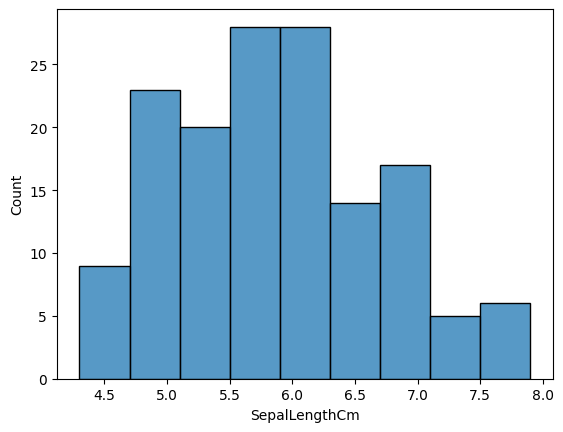

In [ ]:
sns.histplot(data['SepalLengthCm'])
plt.show()

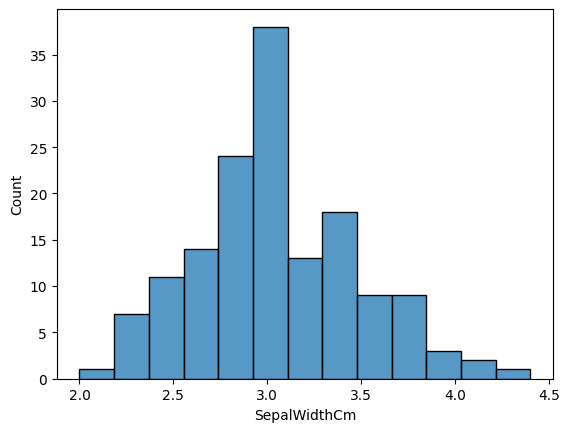

In [ ]:
sns.histplot(data['SepalWidthCm'])
plt.show()

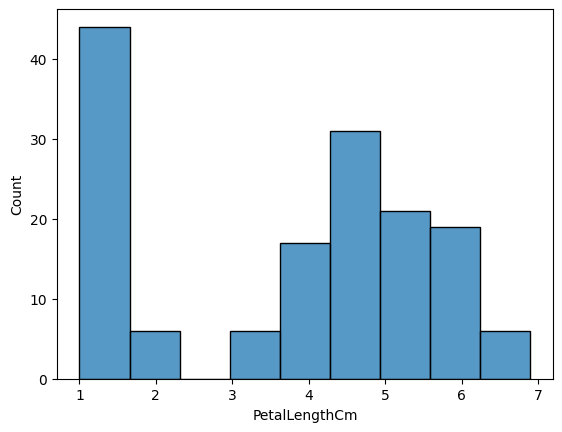

In [ ]:
sns.histplot(data['PetalLengthCm'])
plt.show()

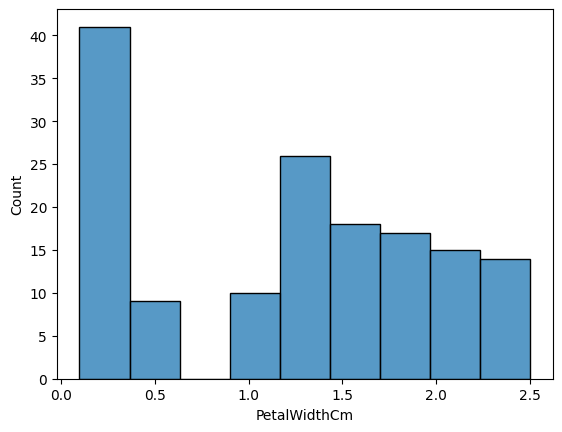

In [ ]:
sns.histplot(data['PetalWidthCm'])
plt.show()

Bivariate Analysis

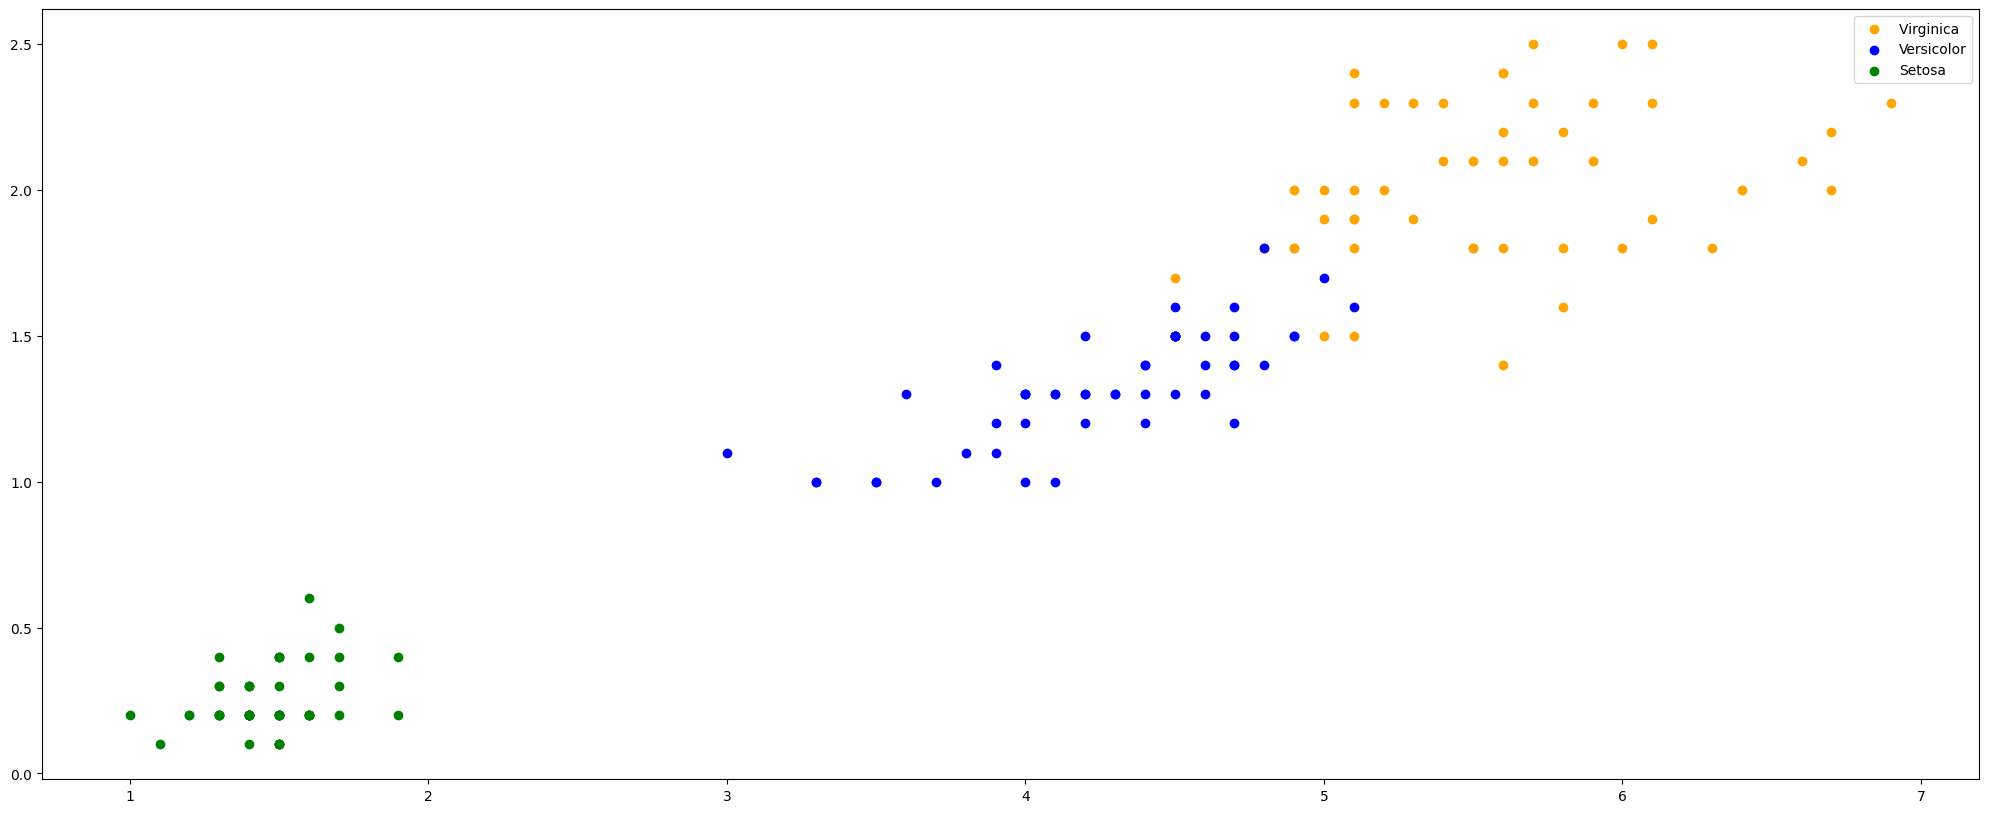

In [ ]:
# visualzing the iris data

plt.figure(figsize=(25,10))
seto = data[data['Species']=='Iris-setosa']
vers = data[data['Species']=='Iris-versicolor']
virg = data[data['Species']=='Iris-virginica']

plt.scatter(virg['PetalLengthCm'],virg['PetalWidthCm'], color='orange' , label='Virginica ')
plt.scatter(vers['PetalLengthCm'],vers['PetalWidthCm'], color='blue', label='Versicolor')
plt.scatter(seto['PetalLengthCm'],seto['PetalWidthCm'], color='green' , label='Setosa')

plt.legend()
plt.show()

In [ ]:
# Drop unnecessary column
data.drop('Id',axis=1,inplace=True)

In [ ]:
data.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


<ipython-input-18-705146371d4c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data1 = sns.heatmap(data.corr(),annot=True)


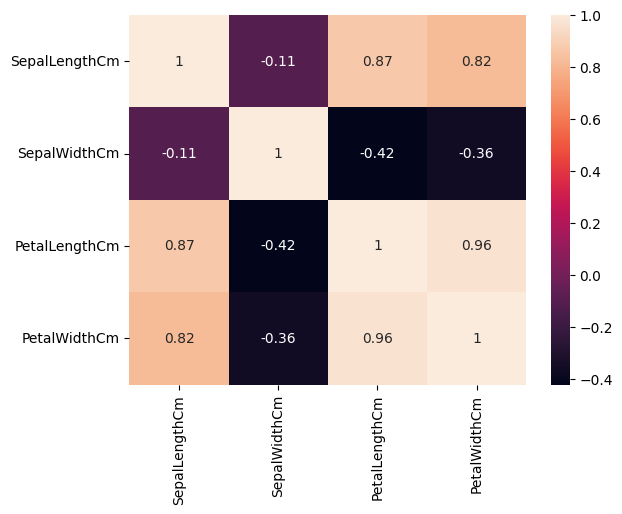

In [ ]:
# correlation of iris dataset
data1 = sns.heatmap(data.corr(),annot=True)
plt.show()

In [ ]:
# Check missing values in data
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
# Since it is an unsupervised learning, we need only the input variables
X= data.iloc[:,:-1]
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# Import KMeans Algorithm from Scikit-learn library
from sklearn.cluster import KMeans


# Initialise the model with K as 3
model = KMeans(n_clusters=3, random_state=10)

#Training the model
model.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=10)

In [ ]:
X.shape

(150, 4)

In [ ]:
# centroids of the clusters
model.cluster_centers_

array([[5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [ ]:
# print dataset with the label
X['Group']= pd.DataFrame(model.labels_)
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Group
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

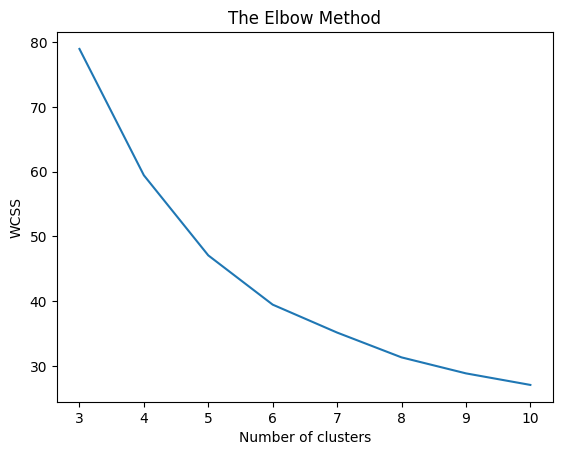

In [ ]:
# using elbow method to find out the best cluster
from sklearn.cluster import KMeans
wcss=[]
for i in range (3,11):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(3,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
label=model.labels_
label

from sklearn.metrics import silhouette_score
score=silhouette_score(X,label)
score #K=3

0.6126634972047179

##Conclusion: Hence, the unsupervised Machine Learning process is completed using python with some data vizualization and other outcomes with the given daatset of iris.csv

##Here we have also performed EDA(Uni & Bivariate) Analysis.